# Statistis Pre-work

In [3]:
import math

import numpy as np
import thinkstats2
import pandas

import chap01soln
import nsfg
import first

%matplotlib inline

import thinkplot

In [4]:
df = nsfg.ReadFemPreg()

# Q1: Chapter 2 Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [5]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [6]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
len(firsts), len(others)

(4413, 4735)

In [7]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()


(7.201094430437772, 7.325855614973262)

In [8]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)


-0.088672927072602

The difference between the in weight between first-born babies and other babies is extremely small

# Q2: Chapter 3 Exercise 1

This problem presents a robust example of actual vs biased data. As a data scientist, it will be important to examine not only the data that is available, but also the data that may be missing but highly relevant. You will see how the absence of this relevant data will bias a dataset, its distribution, and ultimately, its statistical interpretation.

Exercise 1   Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.
Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

In [9]:
resp = nsfg.ReadFemResp()
pmf = thinkstats2.Pmf(resp.numkdhh)

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

/Users/Oren/ds/metis/metisgh/prework/ThinkStats2/code/thinkplot.py:118: UserWarning: Ran out of colors.  Starting over.
  warnings.warn('Ran out of colors.  Starting over.')


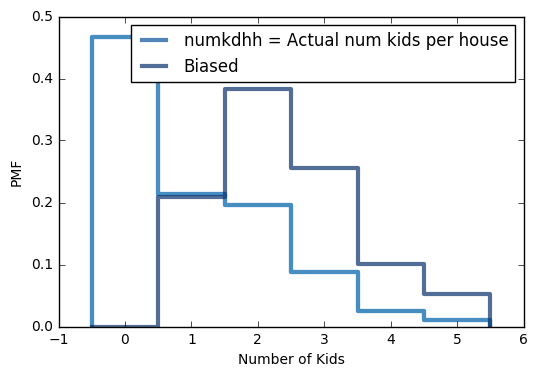

In [12]:
biased_pmf = BiasPmf(pmf, label='Biased')
thinkplot.PrePlot(2)
thinkplot.Pmf(pmf, label='numkdhh = Actual num kids per house')
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Number of Kids', ylabel='PMF')
thinkplot.Show()

In [13]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 1.02420515504
Observed mean 2.40367910066


We see that the class size paradox is an example of sample bias since the survey includes families with children, rather than all families. The difference between the actual and observed means is quite significant. 

# Q3: Chapter 4 Exercise 2

This questions asks you to examine the function that produces random numbers. Is it really random? A good way to test that is to examine the pmf and cdf of the list of random numbers and visualize the distribution. If you're not sure what pmf is, read more about it in Chapter 3.

Exercise 2   

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?


In [17]:
import random

In [18]:
random_list = [random.random() for _ in range(1000)] 

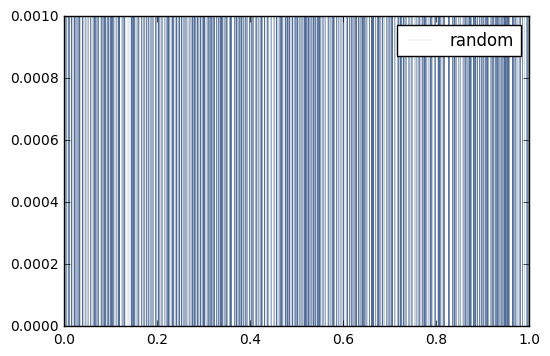

In [21]:
pmf = thinkstats2.Pmf(random_list)
thinkplot.Pmf(pmf, label='random', linewidth=0.1)
thinkplot.Show()

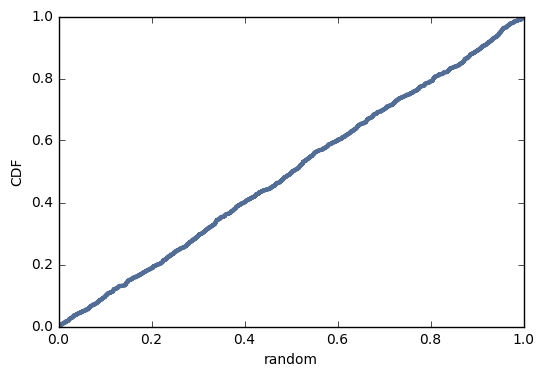

In [24]:
cdf = thinkstats2.Cdf(random_list)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='random', ylabel='CDF')

# Q4: Chapter 5 Exercise 1

This is a classic example of hypothesis testing using the normal distribution. The effect size used here is the Z-statistic.

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1”. 

What percentage of the U.S. male population is in this range? 

Hint: use scipy.stats.norm.cdf.

Blue man requirements in cm:
5'10" = 177.8 cm
6'1"= 185.4 cm

In [26]:
import scipy.stats

In [27]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

In [28]:
dist.mean(), dist.std()

(178.0, 7.7000000000000002)

In [30]:
dist.cdf(mu-sigma)

0.15865525393145741

In [31]:
short=dist.cdf(177.8)
tall =dist.cdf(185.4)

In [32]:
print(short)
print(tall)

0.489639027865
0.831733710811


In [38]:
print(np.round((tall-short)*100, 2))

34.21


34.21 percent of American men could qualify to Blue Mans Group height requirement